<a href="https://colab.research.google.com/github/dauphin95/data_spring/blob/master/%EC%83%89%EC%83%81%EA%B5%AC%EB%B6%84_yolo-cv-signal-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/ultralytics/yolov5/issues/36

In [1]:
# pip install -r https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt

     |████████████████████████████████| 596 kB 5.5 MB/s 
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
import torch
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [3]:
# Model
# model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

# Image
#img = './traffic-signal-1.jpg'
img = cv2.imread('./traffic-signal-1.jpg')[..., ::-1]  # OpenCV image (BGR to RGB)

img.shape

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip


requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...


YOLOv5 🚀 2021-10-26 torch 1.9.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)




requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



  0%|          | 0.00/14.0M [00:00<?, ?B/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


(1170, 1200, 3)

In [12]:
model.conf = 0.5  # confidence threshold (0-1)
model.iou = 0.45  # NMS IoU threshold (0-1)
model.classes =[9]  # (optional list) filter by class, i.e. = [0, 15, 16] for persons, cats and dogs  신호등만 나옴

# Inference
results = model(img, size=920)

In [13]:
from io import BytesIO
from PIL import Image
import base64

In [14]:
results.imgs # array of original images (as np array) passed to model for inference
results.render()  # updates results.imgs with boxes and labels
for img in results.imgs:
    buffered = BytesIO()
    img_base64 = Image.fromarray(img)
    img_base64.save(buffered, format="JPEG")
    #print(base64.b64encode(buffered.getvalue()).decode('utf-8'))  # base64 encoded image with results

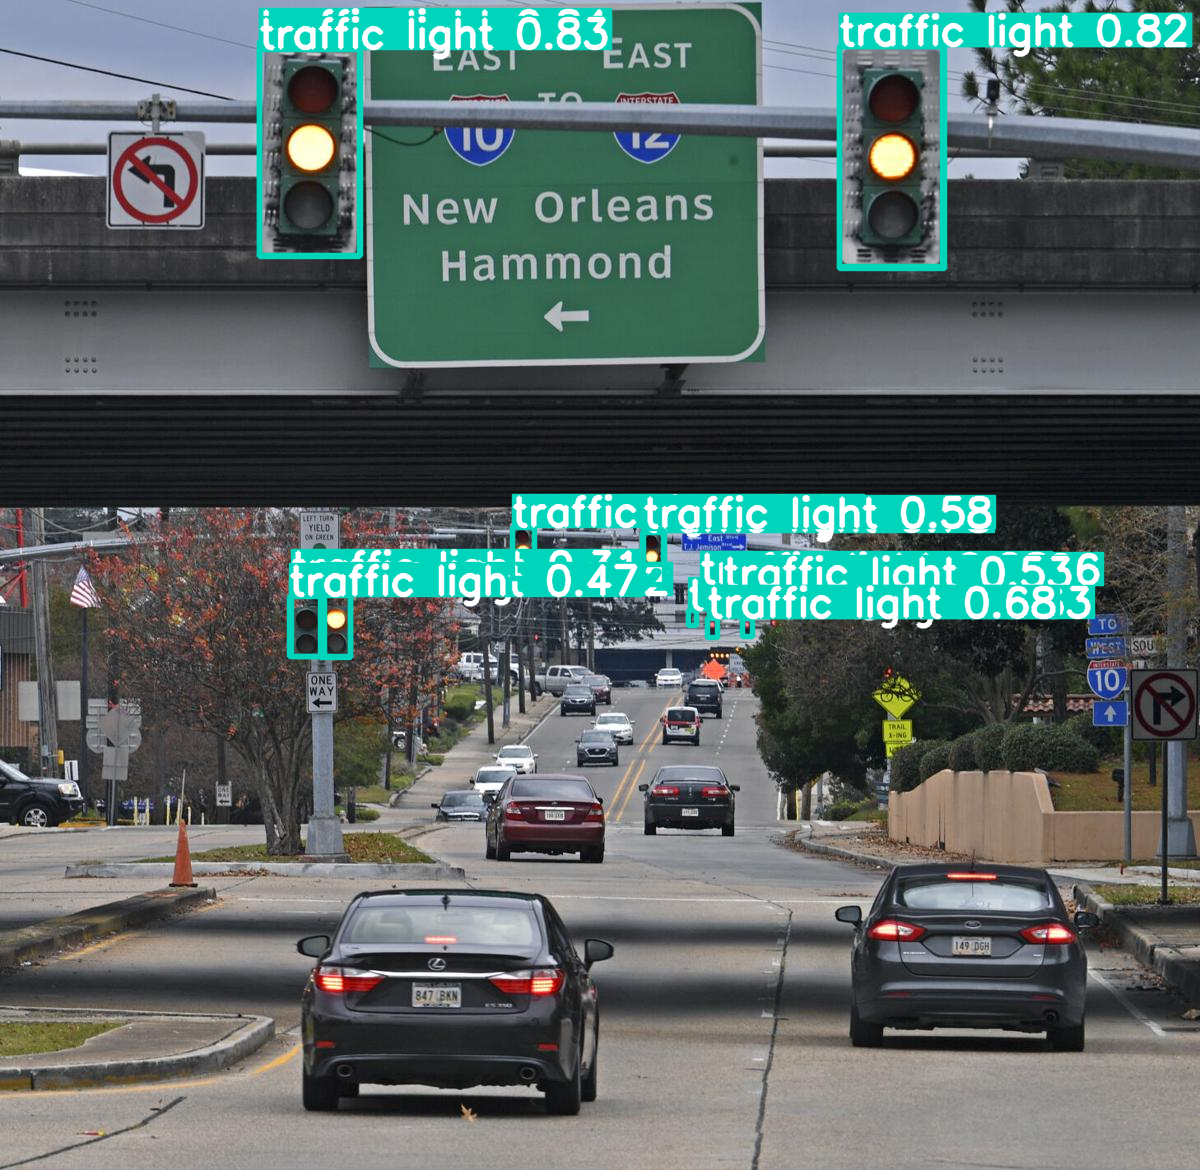

In [15]:
img_base64

In [16]:
crops = results.crop(save=True)  # cropped detections dictionary

Saved 1 image to runs/detect/exp2
Saved results to runs/detect/exp2



In [17]:
no_of_frames = 1  # no_of_frames

In [18]:
for i in range(no_of_frames):
  print(results.pandas().xyxy[i])

  ## confidence level 높이면 갯수 조정 가능

         xmin        ymin        xmax        ymax  confidence  class  \
0  259.913788   49.493538  360.129303  255.420258    0.830078      9   
1  839.870667   46.341599  944.612061  268.189636    0.821289      9   
2  643.318970  528.750000  663.362061  564.956909    0.575684      9   

            name  
0  traffic light  
1  traffic light  
2  traffic light  


In [22]:
crops_image = results.pandas().xyxy[no_of_frames-1]
crops_image

,xmin,ymin,xmax,ymax,confidence,class,name
0,259.913788,49.493538,360.129303,255.420258,0.830078,9,traffic light
1,839.870667,46.341599,944.612061,268.189636,0.821289,9,traffic light
2,643.318970,528.750000,663.362061,564.956909,0.575684,9,traffic light


In [20]:
len(crops_image)

3

In [23]:
results.pandas().xyxy[no_of_frames-1].sort_values('ymin')  # sorted 위에서부터 아래

,xmin,ymin,xmax,ymax,confidence,class,name
1,839.870667,46.341599,944.612061,268.189636,0.821289,9,traffic light
0,259.913788,49.493538,360.129303,255.420258,0.830078,9,traffic light
2,643.318970,528.750000,663.362061,564.956909,0.575684,9,traffic light


In [24]:
target_signal = 1

In [25]:
crops_image.iloc[target_signal,5] == 9 # Traffic light

True

In [26]:
if (crops_image.iloc[target_signal, 5] == 9): # traffic light
  x1, y1, x2, y2 = int(crops_image.iloc[target_signal,0]), int(crops_image.iloc[target_signal,1]), int(crops_image.iloc[target_signal,2]), int(crops_image.iloc[target_signal,3])
  print(x1, y1, x2, y2)
  signal1 = img[y1:y2, x1:x2]
  

839 46 944 268


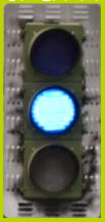

In [27]:
cv2_imshow(signal1)
#cv2.imwrite('./signal-yellow.jpg', signal1)

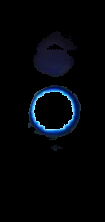

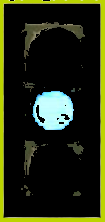

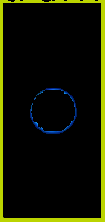

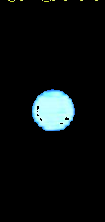

In [29]:
hsv_frame = cv2.cvtColor(signal1, cv2.COLOR_BGR2HSV)

# Red color
low_red = np.array([1, 220, 90]) # 161,155,84 
high_red = np.array([179, 255, 255])
red_mask = cv2.inRange(hsv_frame, low_red, high_red)
red = cv2.bitwise_and(signal1, signal1, mask=red_mask)

# Blue color
low_blue = np.array([94, 80, 2])
high_blue = np.array([126, 255, 255])
blue_mask = cv2.inRange(hsv_frame, low_blue, high_blue)
blue = cv2.bitwise_and(signal1, signal1, mask=blue_mask)

# Green color
low_green = np.array([25, 52, 72])
high_green = np.array([102, 255, 255])
green_mask = cv2.inRange(hsv_frame, low_green, high_green)
green = cv2.bitwise_and(signal1, signal1, mask=green_mask)

# Every color except white
low = np.array([0, 42, 0])
high = np.array([179, 255, 255])
mask = cv2.inRange(hsv_frame, low, high)
result = cv2.bitwise_and(signal1, signal1, mask=mask)

##노랭
l_h, u_h = 0,202
l_s, u_s = 40, 227
l_v, u_v = 206, 255

l_yellow = np.array([l_h, l_s, l_v])
u_yellow = np.array([u_h, u_s, u_v])
yellow_mask = cv2.inRange(hsv_frame, l_yellow, u_yellow)
yellow = cv2.bitwise_and(signal1, signal1, mask=yellow_mask)

#cv2_imshow(signal1)
cv2_imshow(blue)
cv2_imshow(green)
cv2_imshow(red)
cv2_imshow(yellow)
#cv2_imshow(result)

H :0  202
S :40  227
V :206  255

In [ ]:
l_h, u_h = 0,202
l_s, u_s = 40, 227
l_v, u_v = 206, 255

l_yellow = np.array([l_h, l_s, l_v])
u_yellow = np.array([u_h, u_s, u_v])

In [ ]:
yellow_mask = cv2.inRange(hsv_frame, l_yellow, u_yellow)
yellow = cv2.bitwise_and(signal1, signal1, mask=yellow_mask)

In [ ]:
cv2_imshow(yellow)